# **Initial Run**

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sn
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [2]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Exploration (Run)**

# Obtain dataset and Concatenate

In [3]:
def process_custom_folder(custom_path):
    emotions = {'HAP': 'happy', 'SAD': 'sad', 'ANG': 'angry'}

    file_emotion = []
    file_path = []

    for root, _, files in os.walk(custom_path):
        for file in files:
            part = file.split('-')
            emotion = emotions.get(part[1], 'Unknown')
            file_emotion.append(emotion)
            file_path.append(os.path.join(root, file))

    emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
    path_df = pd.DataFrame(file_path, columns=['Path'])
    custom_df = pd.concat([emotion_df, path_df], axis=1)

    return custom_df

# Define your paths
customized_path_to_single = "/content/drive/MyDrive/Colz_Project/Project Dataset"
customized_path_to_double = "/content/drive/MyDrive/Colz_Project/Project Dataset"
customized_path_to_triple = "/content/drive/MyDrive/Colz_Project/Project Dataset"
customized_path_to_fourth = "/content/drive/MyDrive/Colz_Project/Project Dataset"
customized_path_to_fifth = "/content/drive/MyDrive/Colz_Project/Project Dataset"
customized_path_to_sixth = "/content/drive/MyDrive/Colz_Project/Project Dataset"
customized_path_to_seventh = "/content/drive/MyDrive/Colz_Project/Project Dataset"
customized_path_to_eight = "/content/drive/MyDrive/Colz_Project/Project Dataset"
customized_path_to_ninth = "/content/drive/MyDrive/Colz_Project/Project Dataset"
customized_path_to_tenth = "/content/drive/MyDrive/Colz_Project/Project Dataset"

# Process each custom folder
single_df = process_custom_folder(customized_path_to_single)
double_df = process_custom_folder(customized_path_to_double)
triple_df = process_custom_folder(customized_path_to_triple)
fourth_df = process_custom_folder(customized_path_to_fourth)
fifth_df = process_custom_folder(customized_path_to_fifth)
sixth_df = process_custom_folder(customized_path_to_sixth)

seventh_df = process_custom_folder(customized_path_to_seventh)
eight_df = process_custom_folder(customized_path_to_eight)
ninth_df = process_custom_folder(customized_path_to_ninth)
tenth_df = process_custom_folder(customized_path_to_tenth)

# Concatenate the results
Total_df = pd.concat([single_df, double_df, triple_df,fourth_df,fifth_df,sixth_df,seventh_df,eight_df])

# Define custom order for emotions
custom_order = ['angry', 'happy', 'sad']

# Sort and reset index
Total_df['Emotions'] = pd.Categorical(Total_df['Emotions'], categories=custom_order, ordered=True)
Total_df.sort_values('Emotions', inplace=True)
Total_df.reset_index(drop=True, inplace=True)

In [4]:
Single_df = pd.concat([single_df])

# Define custom order for emotions
custom_order = ['angry', 'happy', 'sad']

# Sort and reset index
Single_df['Emotions'] = pd.Categorical(Single_df['Emotions'], categories=custom_order, ordered=True)
Single_df.sort_values('Emotions', inplace=True)
Single_df.reset_index(drop=True, inplace=True)
Single_df['Emotions'].value_counts()

angry    156
happy    155
sad      142
Name: Emotions, dtype: int64

# **Data Visualisation and Exploration**

In [5]:
Total_df['Emotions'].value_counts()

angry    1248
happy    1240
sad      1136
Name: Emotions, dtype: int64

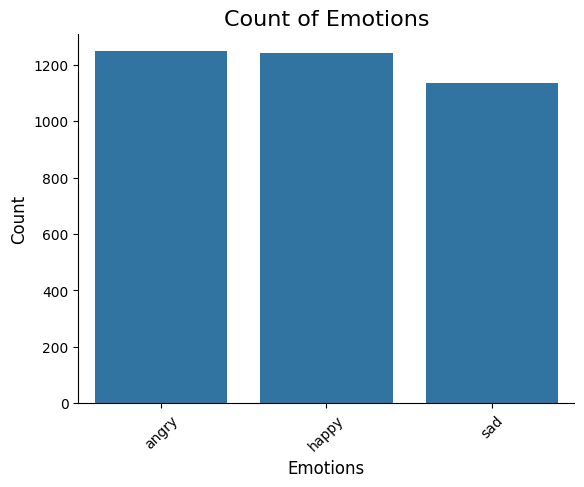

In [6]:
emotion_counts = Total_df['Emotions'].value_counts()
plt.title('Count of Emotions', size=16)
sn.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sn.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

# Feature extration

In [7]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [8]:
extract_mfcc(Total_df['Path'][0])

array([-1.9786714e+02,  2.9641722e+01, -1.9078881e+00,  4.8684468e+00,
        3.7231965e+00,  4.8030168e-02, -1.0885394e+01, -5.7364316e+00,
       -1.7198967e+00, -2.6953921e+00, -8.9455347e+00, -7.3559093e+00,
       -4.0512023e+00, -2.0646970e+00, -5.2187290e+00, -3.8551476e+00,
       -6.6942749e+00,  1.7657000e+00, -9.1053915e+00, -6.5164099e+00,
       -6.7814641e+00, -1.0997227e+00, -1.7688738e+00,  1.7067131e+00,
       -3.8632464e+00,  2.1581700e+00, -3.1269467e-01,  5.6491156e+00,
       -2.2257073e+00,  7.9541355e-01, -7.0999107e+00, -1.2786341e+00,
       -1.5607013e+00,  1.3225489e+00, -1.3777006e+00, -2.6949925e+00,
       -1.6312735e+00,  3.1015565e+00, -1.3591454e+00, -5.2545130e-01],
      dtype=float32)

In [9]:
X_mfcc = Total_df['Path'].apply(lambda x: extract_mfcc(x))

In [10]:
X_mfcc

0       [-197.86714, 29.641722, -1.907888, 4.868447, 3...
1       [-259.0823, 75.604095, -25.048813, 47.44196, 4...
2       [-392.47333, 38.16113, -13.600315, 26.02297, 4...
3       [-279.4633, 111.35723, 3.0211554, 10.829678, -...
4       [-256.2177, 91.323685, 0.98740095, 41.047955, ...
                              ...                        
3619    [-338.21524, 78.22255, 3.6838477, 54.71513, 21...
3620    [-299.81586, 114.896034, -6.782522, 35.830856,...
3621    [-394.7591, 120.906, 47.892788, 20.275606, -14...
3622    [-514.37384, 26.599962, -7.352909, 2.290587, -...
3623    [-342.38098, 85.56315, 13.26212, 20.18416, 6.9...
Name: Path, Length: 3624, dtype: object

In [11]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(3624, 40)

In [12]:
## input split
X = np.expand_dims(X, -1)
X.shape

(3624, 40, 1)

In [13]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(Total_df[['Emotions']])

In [14]:
y = y.toarray()

In [15]:
y.shape

(3624, 3)

# **Split your dataset into training and testing sets**

In [16]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels for both clean and noisy data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.8, random_state=42)

# Further split the training set into training and validation sets
X_validation, X_test, y_validation, y_test =  train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_validation shape:", X_validation.shape)
print("y_validation shape:", y_validation.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (724, 40, 1)
y_train shape: (724, 3)
X_validation shape: (1450, 40, 1)
y_validation shape: (1450, 3)
X_test shape: (1450, 40, 1)
y_test shape: (1450, 3)


# HardCoded Model

In [58]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Layer
from tensorflow.keras.optimizers import Optimizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

import tensorflow as tf
from tensorflow.keras.layers import Layer

In [59]:
class Conv1DLayer(Layer):
    def __init__(self, filters, kernel_size, padding, activation):
        super(Conv1DLayer, self).__init__()
        self.filters = filters
        self.kernel_size = kernel_size
        self.padding = padding
        self.activation = activation

    def build(self, input_shape):
        self.conv1d = tf.keras.layers.Conv1D(
            filters=self.filters,
            kernel_size=self.kernel_size,
            padding=self.padding,
            activation=self.activation
        )

    def call(self, inputs):
        return self.conv1d(inputs)

In [60]:
class MaxPooling1DLayer(Layer):
    def __init__(self, pool_size, padding, strides):
        super(MaxPooling1DLayer, self).__init__()
        self.pool_size = pool_size
        self.padding = padding
        self.strides = strides

    def build(self, input_shape):
        self.maxpool1d = tf.keras.layers.MaxPooling1D(pool_size=self.pool_size, padding=self.padding, strides=self.strides)

    def call(self, inputs):
        return self.maxpool1d(inputs)

In [62]:
class DropoutLayer(Layer):
    def __init__(self, rate):
        super(DropoutLayer, self).__init__()
        self.rate = rate

    def build(self, input_shape):
        self.dropout = tf.keras.layers.Dropout(rate=self.rate)

    def call(self, inputs, training=None):
        return self.dropout(inputs, training=training)

In [63]:
class LSTMLayer(Layer):
    def __init__(self, units, return_sequences=False):
        super(LSTMLayer, self).__init__()
        self.units = units
        self.return_sequences = return_sequences

    def build(self, input_shape):
        self.lstm = tf.keras.layers.LSTM(units=self.units, return_sequences=self.return_sequences)

    def call(self, inputs):
        return self.lstm(inputs)

In [64]:
class DenseLayer(Layer):
    def __init__(self, units, activation):
        super(DenseLayer, self).__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        self.dense = tf.keras.layers.Dense(units=self.units, activation=self.activation)

    def call(self, inputs):
        return self.dense(inputs)

In [86]:
# Create the model
model = tf.keras.Sequential([
    Conv1DLayer(filters=256, kernel_size=5, padding='same', activation='relu'),
    MaxPooling1DLayer(pool_size=2,strides=2, padding='same'),
    Conv1DLayer(filters=128, kernel_size=5, padding='same', activation='relu'),
    Conv1DLayer(filters=64, kernel_size=5, padding='same', activation='relu'),
    Conv1DLayer(filters=32, kernel_size=5, padding='same', activation='relu'),
    DropoutLayer(0.3),

    LSTMLayer(units=128, return_sequences=True),
    DropoutLayer(0.3),
    LSTMLayer(units=64, return_sequences=True),
    DropoutLayer(0.3),
    LSTMLayer(units=32),
    DropoutLayer(0.3),

    DenseLayer(units=128, activation='relu'),
    DropoutLayer(0.3),

    DenseLayer(units=64, activation='relu'),
    DropoutLayer(0.3),

    DenseLayer(units=3, activation='softmax')
])

In [66]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=150, batch_size=512, validation_data=(X_validation, y_validation))

Epoch 1/150
2/2 [==============================] - 12s 3s/step - loss: 1.0991 - accuracy: 0.3301 - val_loss: 1.0974 - val_accuracy: 0.2938
Epoch 2/150
2/2 [==============================] - 2s 943ms/step - loss: 1.0944 - accuracy: 0.3605 - val_loss: 1.0946 - val_accuracy: 0.2938
Epoch 3/150
2/2 [==============================] - 2s 948ms/step - loss: 1.0906 - accuracy: 0.3785 - val_loss: 1.0922 - val_accuracy: 0.2938
Epoch 4/150
2/2 [==============================] - 4s 3s/step - loss: 1.0896 - accuracy: 0.3522 - val_loss: 1.0892 - val_accuracy: 0.2938
Epoch 5/150
2/2 [==============================] - 2s 966ms/step - loss: 1.0876 - accuracy: 0.3702 - val_loss: 1.0856 - val_accuracy: 0.2938
Epoch 6/150
2/2 [==============================] - 2s 948ms/step - loss: 1.0839 - accuracy: 0.3633 - val_loss: 1.0812 - val_accuracy: 0.2952
Epoch 7/150
2/2 [==============================] - 2s 1s/step - loss: 1.0759 - accuracy: 0.3992 - val_loss: 1.0760 - val_accuracy: 0.3276
Epoch 8/150
2/2 [====

In [67]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_layer_10 (Conv1DLay  (None, 40, 256)           1536      
 er)                                                             
                                                                 
 max_pooling1d_layer_7 (Max  (None, 20, 256)           0         
 Pooling1DLayer)                                                 
                                                                 
 conv1d_layer_11 (Conv1DLay  (None, 20, 128)           163968    
 er)                                                             
                                                                 
 conv1d_layer_12 (Conv1DLay  (None, 20, 64)            41024     
 er)                                                             
                                                                 
 conv1d_layer_13 (Conv1DLay  (None, 20, 32)           

In [68]:
# Retrieve the best validation accuracy and the epoch at which it occurred
best_val_accuracy = max(history.history['val_accuracy'])
best_val_accuracy_epoch = history.history['val_accuracy'].index(best_val_accuracy)

print("Best Validation Accuracy:", best_val_accuracy)
print("Epoch with Best Validation Accuracy:", best_val_accuracy_epoch + 1)

Best Validation Accuracy: 0.9275861978530884
Epoch with Best Validation Accuracy: 139


In [73]:
# Save the model in HDF5 format
model.save('/content/drive/MyDrive/Colz_Project/Extra Files/Custom.h5')

#Graph

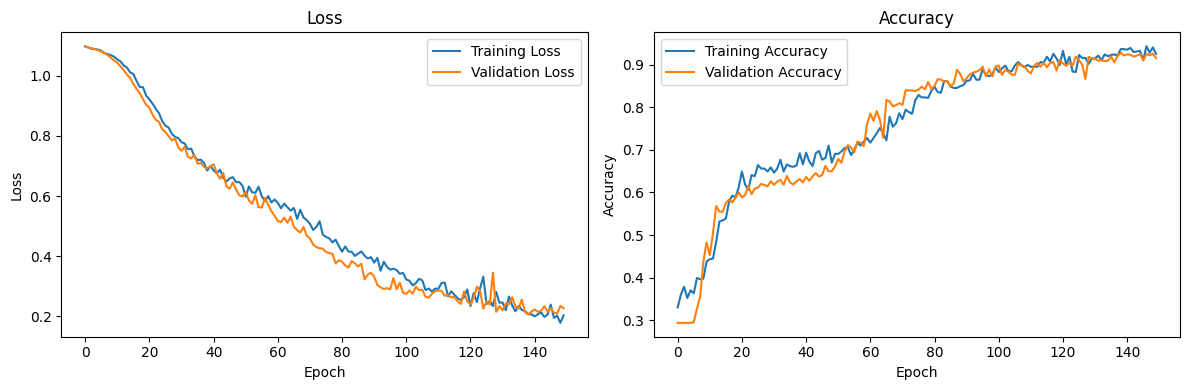

In [72]:
#Plotting the graph
# Get training and validation loss and accuracy from the history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot loss
ax1.set_title('Loss')
ax1.plot(training_loss, label='Training Loss')
ax1.plot(validation_loss, label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot accuracy
ax2.set_title('Accuracy')
ax2.plot(training_accuracy, label='Training Accuracy')
ax2.plot(validation_accuracy, label='Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plots
plt.tight_layout()
plt.savefig('loss_accuracy.png')
plt.show()

#Confusion Matrix

46/46 [==============================] - 3s 32ms/step


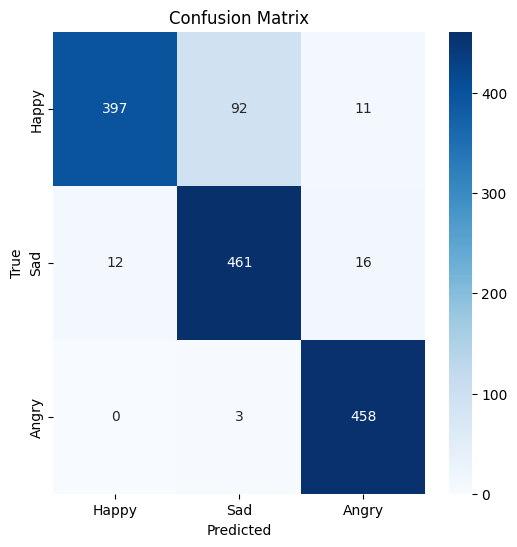

In [71]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class_labels = ['Happy', 'Sad', 'Angry']

# Predictions on the test set
y_pred = model.predict(np.expand_dims(X_test, -1))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plotting the Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#Classification Report

In [77]:
from sklearn.metrics import classification_report

In [78]:
#Classification Report
emotion_names = [class_labels[i] for i in range(len(class_labels))]
classification_report_str = classification_report(y_true, y_pred_classes, target_names=emotion_names)


print("Classification Report:\n", classification_report_str)

Classification Report:
               precision    recall  f1-score   support

       Happy       0.97      0.79      0.87       500
         Sad       0.83      0.94      0.88       489
       Angry       0.94      0.99      0.97       461

    accuracy                           0.91      1450
   macro avg       0.91      0.91      0.91      1450
weighted avg       0.91      0.91      0.91      1450



# Demo

In [84]:
import librosa
import numpy as np
from keras.models import load_model
import tensorflow as tf

# Function to preprocess audio
def preprocess_audio(filename, noise_level=0.01):
    # Load audio
    y, sr = librosa.load(filename, duration=3, offset=0.5)

    # Extract MFCC features
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)

    return mfcc

# Load the trained model
model_path = '/content/drive/MyDrive/Colz_Project/Extra Files/Custom.h5'
loaded_model = load_model(model_path, custom_objects={'Conv1DLayer': Conv1DLayer,'MaxPooling1DLayer':MaxPooling1DLayer,'DropoutLayer':DropoutLayer,'LSTMLayer':LSTMLayer,'DenseLayer':DenseLayer})

# Define audio filenames
audio_filenames = [
    '/content/drive/MyDrive/Colz_Project/Project Dataset/Nihit/NIHIT-HAP-1.mp3'
]

# Iterate over audio filenames
for i, audio_filename in enumerate(audio_filenames):
    # Preprocess the audio
    preprocessed_audio = preprocess_audio(audio_filename)

    # Make predictions
    predicted_probabilities = loaded_model.predict(np.expand_dims(preprocessed_audio, axis=0))
    predicted_class = np.argmax(predicted_probabilities)

    # Map the predicted class to emotion
    class_to_emotion = {
        0: 'angry',
        1: 'happy',
        2: 'sad'
    }

    predicted_emotion = class_to_emotion[predicted_class]

    # Print the predicted emotion for each audio file
    print(f"Predicted Emotion for Audio {i + 1}: {predicted_emotion}")


1/1 [==============================] - 1s 1s/step
Predicted Emotion for Audio 1: happy


In [85]:
import os
import numpy as np

# Assuming preprocess_audio and loaded_model are defined somewhere in your code

# Directory containing audio files
audio_directory = '/content/drive/MyDrive/Colz_Project/Project Dataset/'

# Initialize counters
total_files = 0
files_with_ang_in_name = 0
predicted_angry_count = 0
predicted_angry_with_ang_in_name_count = 0
files_with_sad_in_name = 0
predicted_sad_count = 0
predicted_sad_with_sad_in_name_count = 0
files_with_hap_in_name = 0
predicted_happy_count = 0
predicted_happy_with_hap_in_name_count = 0

# Iterate over all files in the directory and its subdirectories
for root, _, files in os.walk(audio_directory):
    for filename in files:
        if filename.endswith(".mp3"):
            # Update total files count
            total_files += 1

            # Check if "HAP", "ANG", or "SAD" is in the filename
            if "HAP" in filename:
                files_with_hap_in_name += 1
            if "ANG" in filename:
                files_with_ang_in_name += 1
            if "SAD" in filename:
                files_with_sad_in_name += 1

            # Preprocess the audio
            audio_filepath = os.path.join(root, filename)
            preprocessed_audio = preprocess_audio(audio_filepath)

            # Make predictions
            predicted_probabilities = loaded_model.predict(np.expand_dims(preprocessed_audio, axis=0))
            predicted_class = np.argmax(predicted_probabilities)

            # Map the predicted class to emotion
            class_to_emotion = {
                0: 'angry',
                1: 'happy',
                2: 'sad'
            }

            predicted_emotion = class_to_emotion[predicted_class]

            # Update counts for predicted emotions
            if predicted_emotion == 'angry':
                predicted_angry_count += 1

                # Check if "ANG" is in the filename for predicted "angry" files
                if "ANG" in filename:
                    predicted_angry_with_ang_in_name_count += 1

            elif predicted_emotion == 'sad':
                predicted_sad_count += 1

                # Check if "SAD" is in the filename for predicted "sad" files
                if "SAD" in filename:
                    predicted_sad_with_sad_in_name_count += 1

            elif predicted_emotion == 'happy':
                predicted_happy_count += 1

                # Check if "HAP" is in the filename for predicted "happy" files
                if "HAP" in filename:
                    predicted_happy_with_hap_in_name_count += 1

            # Print the filename and predicted emotion
            print(f"Predicted Emotion for {filename}: {predicted_emotion}")

# Print the summary counts
print(f"Total Files: {total_files}")
print(f"Files with 'ANG' in Name: {files_with_ang_in_name}")
print(f"Predicted 'Angry' Files: {predicted_angry_count}")
print(f"Predicted 'Angry' Files with 'ANG' in Name: {predicted_angry_with_ang_in_name_count}")
print("____________________________________________________")
print(f"Files with 'SAD' in Name: {files_with_sad_in_name}")
print(f"Predicted 'Sad' Files: {predicted_sad_count}")
print(f"Predicted 'Sad' Files with 'SAD' in Name: {predicted_sad_with_sad_in_name_count}")
print("____________________________________________________")
print(f"Files with 'HAP' in Name: {files_with_hap_in_name}")
print(f"Predicted 'Happy' Files: {predicted_happy_count}")
print(f"Predicted 'Happy' Files with 'HAP' in Name: {predicted_happy_with_hap_in_name_count}")

1/1 [==============================] - 0s 101ms/step
Predicted Emotion for Rashmila-HAP-3.mp3: angry
1/1 [==============================] - 0s 104ms/step
Predicted Emotion for Rashmila-ANG-2.mp3: sad
1/1 [==============================] - 0s 100ms/step
Predicted Emotion for Rashmila-ANG-3.mp3: angry
1/1 [==============================] - 0s 77ms/step
Predicted Emotion for Rashmila-HAP-1.mp3: happy
1/1 [==============================] - 0s 36ms/step
Predicted Emotion for Rashmila-SAD-2.mp3: sad
1/1 [==============================] - 0s 82ms/step
Predicted Emotion for Rashmila-ANG-1.mp3: angry
1/1 [==============================] - 0s 81ms/step
Predicted Emotion for Rashmila-SAD-1.mp3: sad
1/1 [==============================] - 0s 83ms/step
Predicted Emotion for Rashmila-HAP-2.mp3: angry
1/1 [==============================] - 0s 46ms/step
Predicted Emotion for Rashmila-HAP-4.mp3: happy
1/1 [==============================] - 0s 41ms/step
Predicted Emotion for Rashmila-HAP-6.mp3: sad
1/1 [